# **Assignment 1**
## **Group 2:**
* Karyl Grasparil
* Mariah Quinquito
* Yanna Polonia

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Data Steps

## Loading CC General.csv  into a pandas dataframe named data and printing its header

In [2]:
data = pd.read_csv('CC_GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##  Summarizing data, explaining and making observations about each column in the dataset

In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<table>
<tr><tr><th><th style="text-align:center">Feature<th style="text-align:center">Kaggle Description<th style="text-align:center">Observations<tr><tr>
<tr><td><td style="text-align:center">BALANCE<td style="text-align:left">Balance amount left in their account to make purchases<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is disperse (std >> mean) and right-skewed (mean > median)<td>
<tr><td><td style="text-align:center">BALANCE_FREQUENCY<td style="text-align:left">How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse, being most values cluster around the higher end of the scale (mean slightly lower than the median)<td>
<tr><td><td style="text-align:center">PURCHASES<td style="text-align:left">Amount of purchases made from account<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and heavily right-skewed<td>
<tr><tr><tr><td><td style="text-align:center">ONEOFF_PURCHASES<td style="text-align:left">Maximum purchase amount done in one-go<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and heavily right-skewed<td>
<tr><td><td style="text-align:center">INSTALLMENTS_PURCHASES<td style="text-align:left">Amount of purchase done in installment<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and heavily right-skewed<td>
<tr><td><td style="text-align:center">CASH_ADVANCE<td style="text-align:left">Cash in advance given by the user<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data highly disperse and heavily right-skewed<td>
<tr><td><td style="text-align:center">PURCHASES_FREQUENCY<td style="text-align:left">How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse but many values cluster at lower levels<td>
<tr><tr><tr><td><td style="text-align:center">ONEOFF_PURCHASES_FREQUENCY<td style="text-align:left">How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse being most values concentrated at the lower end<td>
<tr><td><td style="text-align:center">PURCHASES_INSTALLMENTS_FREQUENCY<td style="text-align:left">How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse being most values concentrated at the lower end<td>
<tr><td><td style="text-align:center">CASH_ADVANCE_FREQUENCY<td style="text-align:left">How frequently the cash in advance being paid<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse being most values concentrated at the lower end<td>
<tr><td><td style="text-align:center">CASH_ADVANCE_TRX<td style="text-align:left">Number of Transactions made with "Cash in Advanced"<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse being most values concentrated at the lower end<td>
<tr><td><td style="text-align:center">PURCHASES_TRX<td style="text-align:left">Number of purchase transactions made<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse being most values concentrated at the lower end<td>
<tr><td><td style="text-align:center">CREDIT_LIMIT<td style="text-align:left">Limit of Credit Card for user<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is disperse and right-skewed<td>
<tr><td><td style="text-align:center">PAYMENTS<td style="text-align:left">Amount of Payment done by usertd><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and right-skewed<td>
<tr><tr><tr><td><td style="text-align:center">MINIMUM_PAYMENTS<td style="text-align:left">Minimum amount of payments made by user<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and right-skewed<td>
<tr><td><td style="text-align:center">PRC_FULL_PAYMENT<td style="text-align:left">Percent of full payment paid by user<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is disperse and right-skewed<td>
<tr><td><td style="text-align:center">TENURE<td style="text-align:left">Tenure of credit card service for user<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is relatively low in dispersion, most values are concentrated around the upper limit of 12<td>
</table>

## Verifying the data type of each entry and if there are any missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### <span style='color:blue'>There are missing values for the following features:</span>
* <span style='color:blue'>CREDIT_LIMIT (1 missing value)</span>
* <span style='color:blue'>MINIMUM_PAYMENTS (313 missing values)</span>

### <span style='color:blue'>The data type for each feature is adequate</span>

## Validating if there are duplicated entries

In [5]:
data[data.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [6]:
# Displaing amount of null values per each feature
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Verifying any conexion with other features when MINIMUM_PAYMENTS values are null
data[data['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


## Handling missing values

In [8]:
# Imputing the missing value of CREDIT_LIMIT with the median as the data for this feature is skewed
median_value = data['CREDIT_LIMIT'].median()
data['CREDIT_LIMIT'].fillna(median_value, inplace=True)
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Validating how many records we have with BALANCE = 0 (if there is no balance, there isn't a minimum payment)
data[data['BALANCE'] == 0].count()

CUST_ID                             80
BALANCE                             80
BALANCE_FREQUENCY                   80
PURCHASES                           80
ONEOFF_PURCHASES                    80
INSTALLMENTS_PURCHASES              80
CASH_ADVANCE                        80
PURCHASES_FREQUENCY                 80
ONEOFF_PURCHASES_FREQUENCY          80
PURCHASES_INSTALLMENTS_FREQUENCY    80
CASH_ADVANCE_FREQUENCY              80
CASH_ADVANCE_TRX                    80
PURCHASES_TRX                       80
CREDIT_LIMIT                        80
PAYMENTS                            80
MINIMUM_PAYMENTS                     6
PRC_FULL_PAYMENT                    80
TENURE                              80
dtype: int64

In [10]:
# Replacing with 0, the null values in MINIMUM_PAYMENTS when the BALANCE is equal to 0
data.loc[data['BALANCE'] == 0, 'MINIMUM_PAYMENTS'] = 0
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    239
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### <span style='color:blue'>According to ['BDO Debt Solutions'](https://debtsolutions.bdo.ca/how-your-credit-card-minimum-payment-is-calculated/), credit card issuers will calculate your minimum payment as a percentage of your total balance, typically between 2% and 3%, or a minimum of $10, whichever amount is higher.</span>

In [11]:
# Based on what was stated before replacing MINIMUM_PAYMENTS values with the maximum value between the 2% of the 
# balance or 10
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(np.maximum(data['BALANCE'] * 0.2, 10))
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Dropping the CUST_ID column

In [12]:
data.drop(columns = ['CUST_ID'], inplace = True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,333.334108,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Using seaborn.heatmap to display the correlation matrix of the features 

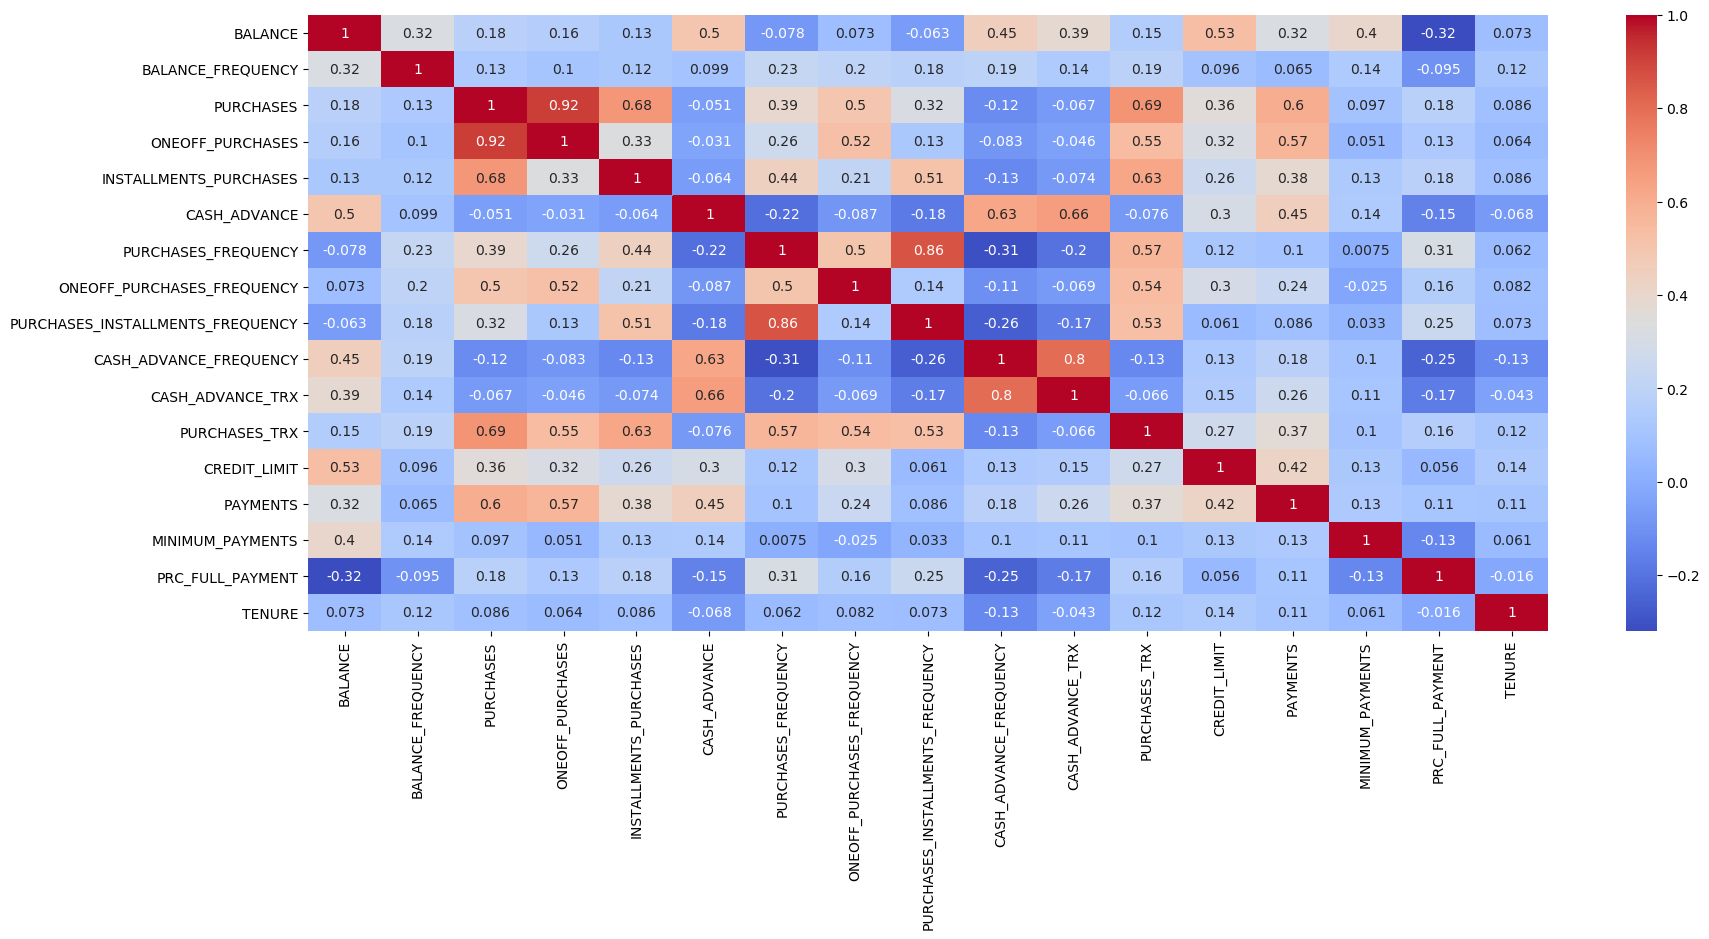

In [13]:
# (using corr function in pandas to obatin correlation of columns), using cmap = 'coolwarm'
# to differentiate high, low, and medium correlations
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)
plt.show()

## Using seaborn.pairplot to generate scatterplots and histograms

<Figure size 2000x800 with 0 Axes>

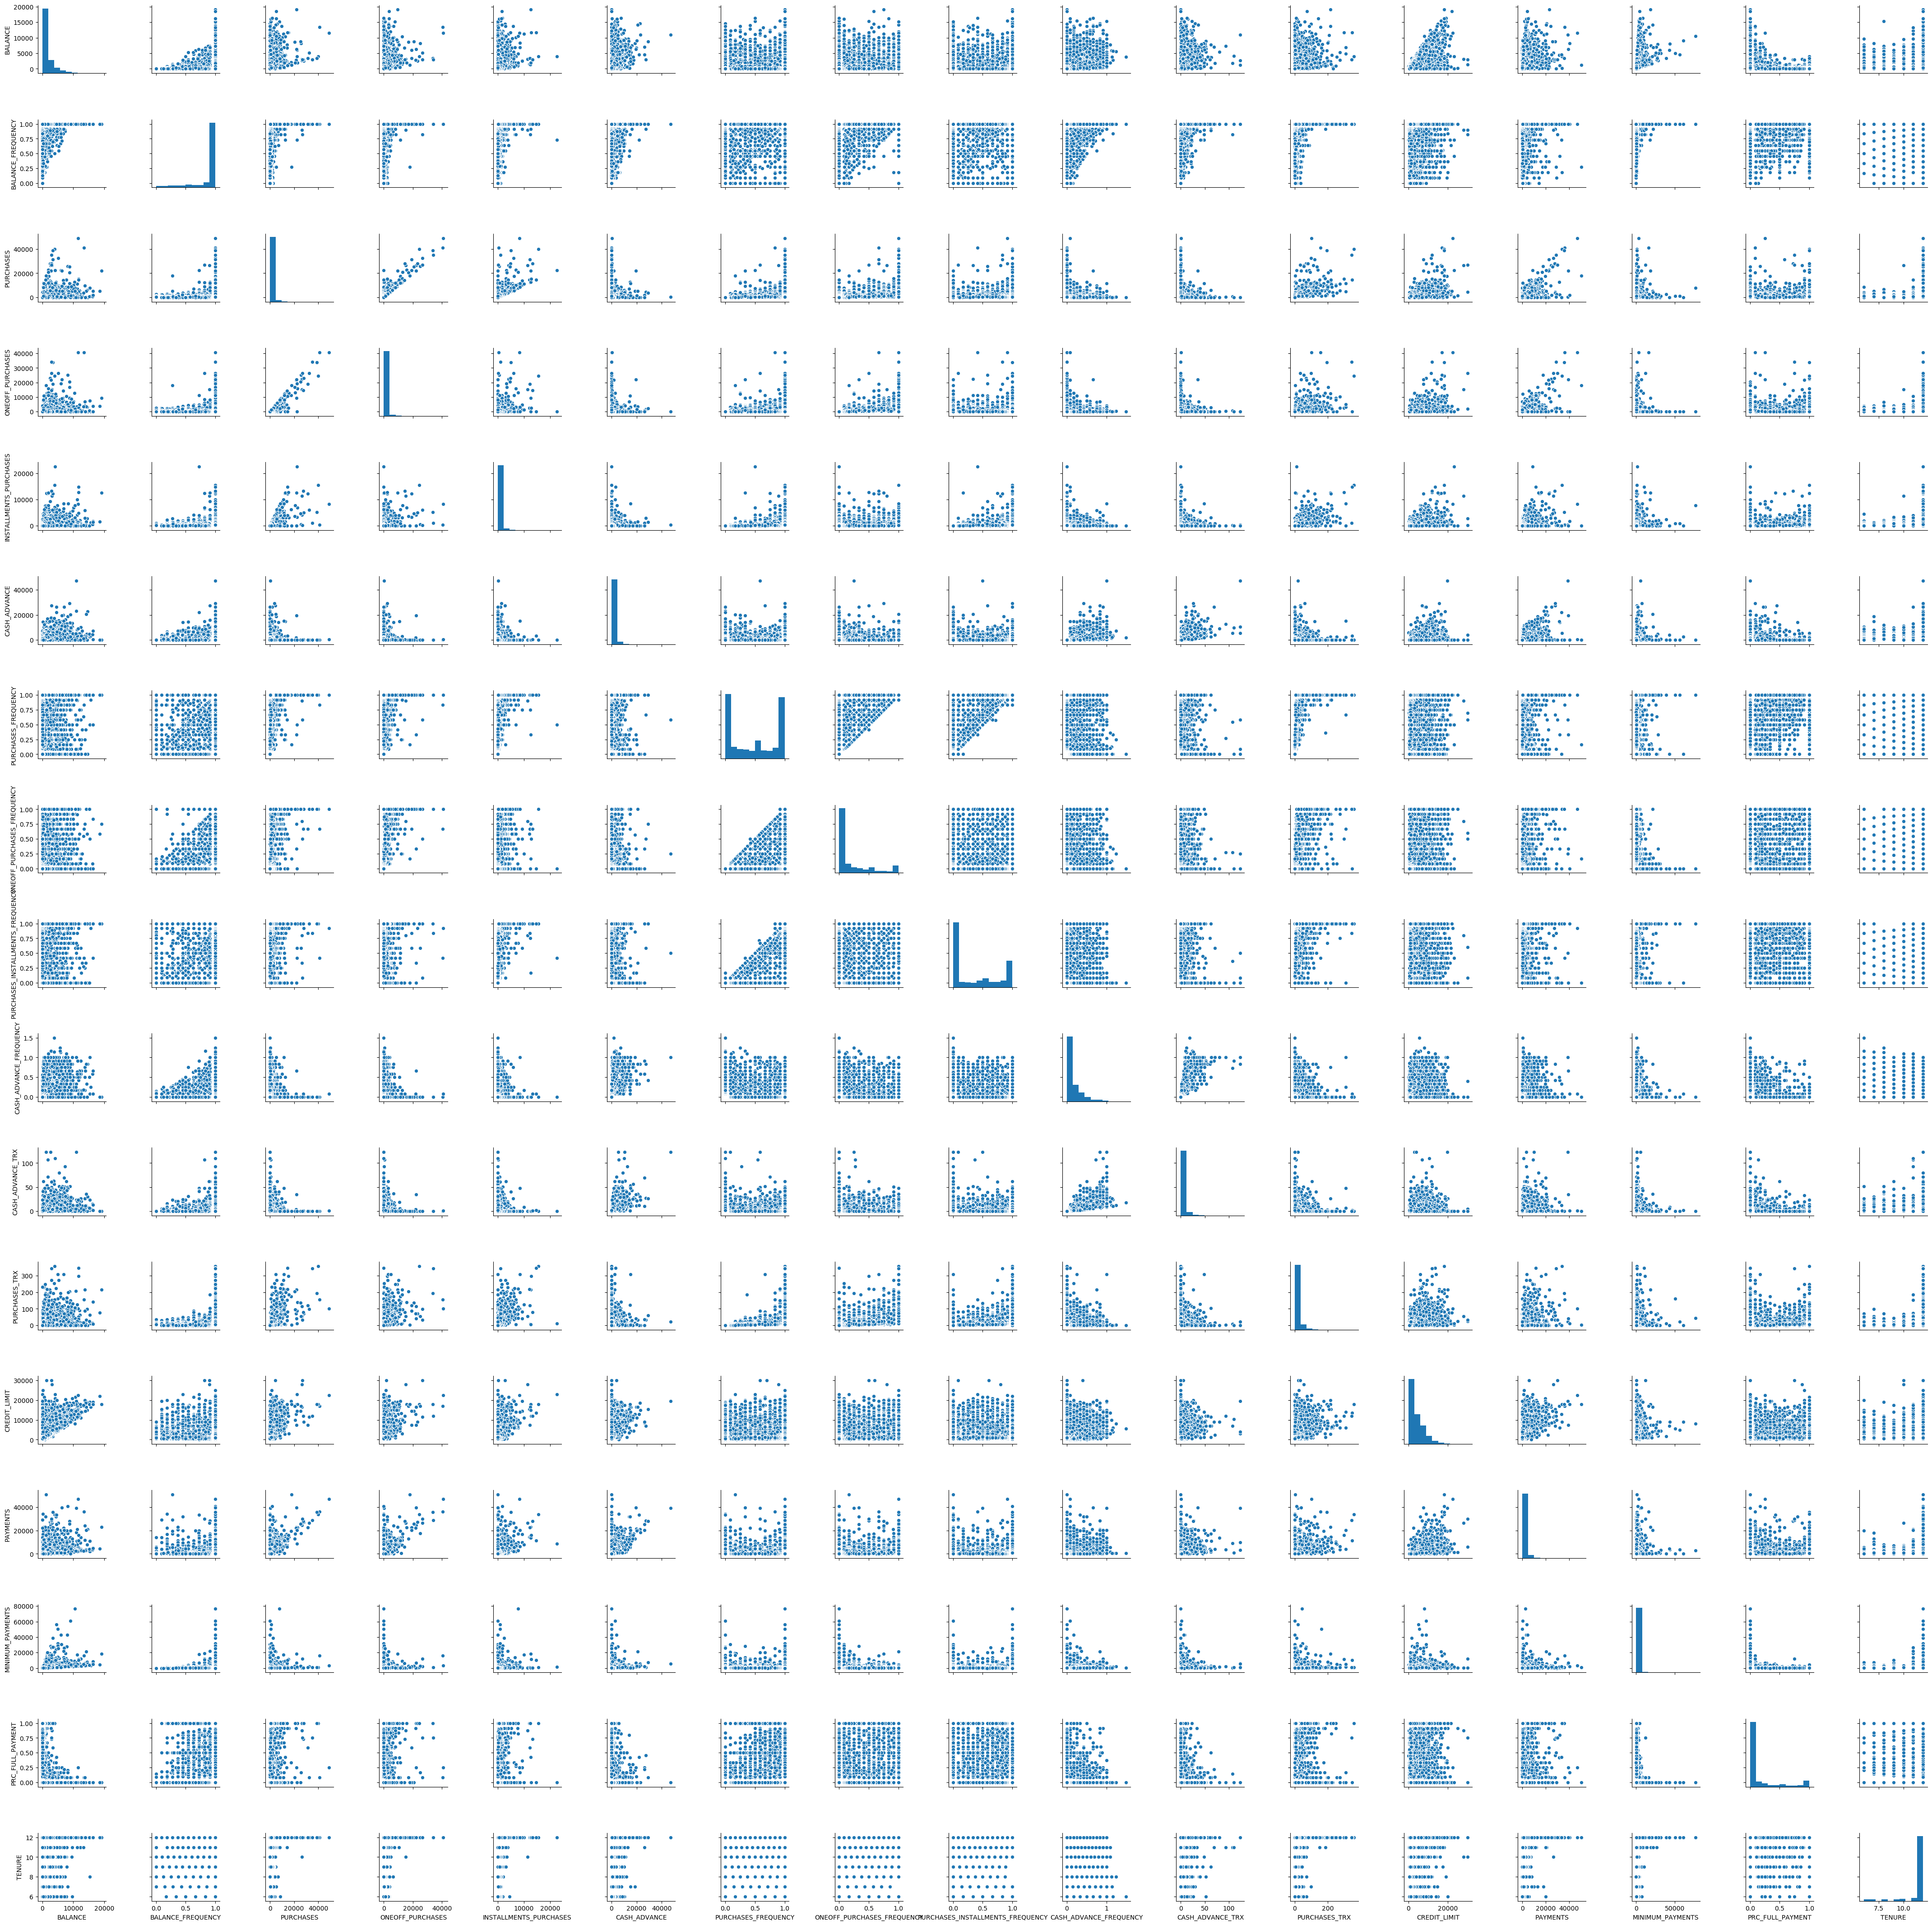

In [14]:
plt.figure(figsize = (20,8))
sns.pairplot(data)
plt.show()

### <span style='color:blue'>The highest correlation (top three) among columns are as follow:</span>

* <span style='color:blue'>PURCHASES and ONOFF_PURCHASES</span>
* <span style='color:blue'>PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY</span>
* <span style='color:blue'>CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX</span>

#### <span style='color:blue'>Note: There is almost a linear relationship between pairs listed before, somehow the two variables change in a similar manner, and changes in one can predict changes in the other.</span>

### <span style='color:blue'>The lowest correlation (top three) among columns are as follow:</span>

* <span style='color:blue'>BALANCE and PRC_FULL_PAYMENT</span>
* <span style='color:blue'>PURCHASES_FREQUENCY and CASH_ADVANCE_FREQUENCY</span>
* <span style='color:blue'>CASH_ADVANCE_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY</span>

#### <span style='color:blue'>Note: There is almost a inverse proposional linear relationship between pairs listed before.</span>

# 2. Modeling Steps

## Scaling the data using sklearn.preprocessing.StandardScaler and printing the header

In [15]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()
# Fitting and transforming the data
scaled_data = scaler.fit_transform(data)

# Converting scaled data back to pandas DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data)

# Verifying scaling printing the header of scaled_df
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014035,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004363,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


## Using sklearn.cluster.AgglomerativeClustering to cluster the data agglomeratively and calculating silhouette score for each cluster

In [16]:
# Creating at least 10 different models with different choices for hyperparameters: 
# n_clusters, metric, linkage, and distance_threshold, considering that:
# * n_clusters could accept as value an int number, being the default one 2.
# * Affinity could accept as value: euclidean (default), l1, l2, manhattan, cosine or precomputed
# * Linkage could accept as value: ward (default), single, complete or average. If value is 'ward' the only 
# affinity value accepted is 'euclidean'.
# Distance Threshold could accet as value a float number, being the default one "None".

# Defining list to use to generate agglomerative clusters with different parameters combinations
affinity_values = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'cosine', 'euclidean', 'l1', 'l2', \
                   'manhattan']
linkage_values = ['ward', 'single', 'complete', 'average', 'complete', 'single', 'ward', 'average', \
                  'single', 'complete']
agglom_clusters = []
n_cluster_values = []
silhouette_scores = []

for i in range(2, 12):
    # Clustering the data using values from 2 to 11 as values for n_cluster parameter combined with the
    # corresponding value based on the index in the list affinity_values and linkage_values
    print(f'n_cluster = {i}\n')
    
    if i == 2:
        # Complying with the statement that exactly one of n_clusters and distance_threshold has to be set, and 
        # the other needs to be None.
        agglom_clusters.append(AgglomerativeClustering(n_clusters=None, affinity=affinity_values[i - 2], \
                                                   linkage=linkage_values[i - 2], \
                                                   distance_threshold=(i/10)).fit(scaled_data))
    
    agglom_clusters.append(AgglomerativeClustering(n_clusters=i, affinity=affinity_values[i - 2], \
                                                   linkage=linkage_values[i - 2]).fit(scaled_data))
    print(agglom_clusters[i - 2])
    
    # Calculating silhoutte score for each cluster
    silhouette_scores.append(silhouette_score(scaled_data, agglom_clusters[i - 2].fit_predict(scaled_data)))
    print(f'\nSilhoutte Score: {silhouette_scores[i - 2]}\n')
    
    n_cluster_values.append(i)

n_cluster = 2

AgglomerativeClustering(distance_threshold=0.2, n_clusters=None)

Silhoutte Score: 0.22834375473019977

n_cluster = 3

AgglomerativeClustering()

Silhoutte Score: 0.3554211467774732

n_cluster = 4

AgglomerativeClustering(affinity='l1', linkage='single', n_clusters=3)

Silhoutte Score: 0.37322757458323674

n_cluster = 5

AgglomerativeClustering(affinity='l2', linkage='complete', n_clusters=4)

Silhoutte Score: 0.28508797951209636

n_cluster = 6

AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=5)

Silhoutte Score: 0.22452833351122617

n_cluster = 7

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=6)

Silhoutte Score: 0.2170799555281758

n_cluster = 8

AgglomerativeClustering(affinity='cosine', linkage='single', n_clusters=7)

Silhoutte Score: 0.16464714601477923

n_cluster = 9

AgglomerativeClustering(n_clusters=8)

Silhoutte Score: 0.256724555997071

n_cluster = 10

AgglomerativeClustering(affinity='l1', linkage='aver

## Tabulating and plotting the silhouette scores obtained

In [17]:
# Zipping n_cluster_values and silhouette_scores
table = zip(n_cluster_values, silhouette_scores)
print(tabulate(table, headers = ['n_cluster', 'silhouette score'], tablefmt = 'fancy_grid'))

╒═════════════╤════════════════════╕
│   n_cluster │   silhouette score │
╞═════════════╪════════════════════╡
│           2 │           0.228344 │
├─────────────┼────────────────────┤
│           3 │           0.355421 │
├─────────────┼────────────────────┤
│           4 │           0.373228 │
├─────────────┼────────────────────┤
│           5 │           0.285088 │
├─────────────┼────────────────────┤
│           6 │           0.224528 │
├─────────────┼────────────────────┤
│           7 │           0.21708  │
├─────────────┼────────────────────┤
│           8 │           0.164647 │
├─────────────┼────────────────────┤
│           9 │           0.256725 │
├─────────────┼────────────────────┤
│          10 │           0.159161 │
├─────────────┼────────────────────┤
│          11 │           0.2245   │
╘═════════════╧════════════════════╛


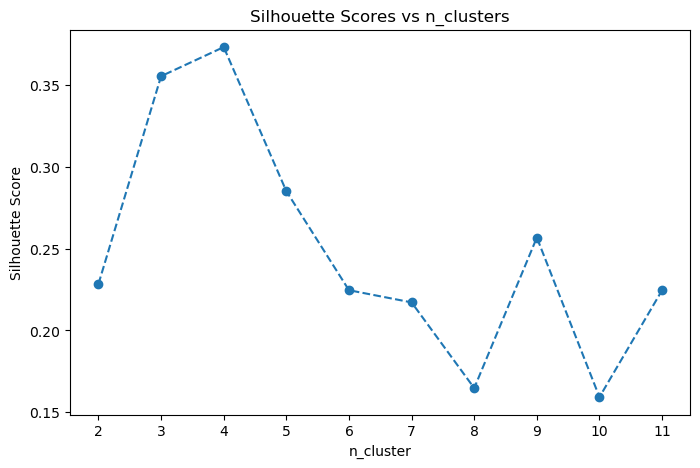

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(n_cluster_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('n_cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs n_clusters')
plt.xticks(n_cluster_values)
plt.show()

## Using scipy.cluster.hierarchy.fcluster to cluster the data divisively

In [19]:
# Generating a distance matrix with 'linkage' function, being the input required for fcluster Z ndarray
distances = linkage(scaled_data, method = 'centroid', metric = 'euclidean')
distances

array([[5.21900000e+03, 8.44200000e+03, 1.72999894e-04, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 2.06843536e-04, 2.00000000e+00],
       [1.13100000e+03, 8.95100000e+03, 4.02684756e-04, 3.00000000e+00],
       ...,
       [1.78930000e+04, 1.78950000e+04, 1.27074682e+00, 8.94300000e+03],
       [2.15900000e+03, 1.78960000e+04, 1.83190708e+00, 8.94400000e+03],
       [1.78880000e+04, 1.78970000e+04, 1.86036206e+00, 8.95000000e+03]])

In [20]:
# Creating at least 10 different models with different choices for hyperparameters: t, criterion, and depth. 
# * t is a scalar that could be an int or float value, represent a threshold for the first 3 values listed below
# in criterion or the max number of clusters requested for the last three values listed below in for criterion.
# * criterion could accept as value: 'inconsistent','distance', ‘monocrit’, 'maxclust', ‘maxclust_monocrit’
# * depth, the maximum depth to perform the inconsistency calculation, accepts an int value being the default 2.

# Defining list to use to create fclusters with different parameters combinations
criterion = ['maxclust', 'inconsistent', 'maxclust', 'inconsistent', 'maxclust', 'distance', 'maxclust', \
             'distance', 'maxclust', 'distance']
fclusters = []
values = []
fcluster_silhouette_scores = []

for j in range(2, 12):
    values.append(j)
    print(f'Threshold: {values[j - 2]} \n')
    
    fclusters.append(fcluster(distances, j, criterion[j - 2], depth = j))
    print(fclusters[j - 2])
  
    # Checking the number of unique clusters
    unique_clusters = np.unique(fclusters[j - 2])
    print(f'\nUnique Clusters: {len(unique_clusters)}\n')
        
    # Calculating silhouette score if there are at least 2 clusters
    if len(unique_clusters) > 1:  # Checking if more than 1 cluster exists
        fcluster_silhouette_scores.append(silhouette_score(data, fclusters[j - 2]))
    else:
        fcluster_silhouette_scores.append(None)

    print(f'\nSilhouette Score: {fcluster_silhouette_scores[j - 2]}\n')

Threshold: 2 

[2 2 2 ... 2 2 2]

Unique Clusters: 2


Silhouette Score: 0.8872984347795644

Threshold: 3 

[1 1 1 ... 1 1 1]

Unique Clusters: 1


Silhouette Score: None

Threshold: 4 

[2 2 2 ... 2 2 2]

Unique Clusters: 4


Silhouette Score: 0.8298503955824588

Threshold: 5 

[1 1 1 ... 1 1 1]

Unique Clusters: 1


Silhouette Score: None

Threshold: 6 

[2 2 2 ... 2 2 2]

Unique Clusters: 6


Silhouette Score: 0.7560189777178176

Threshold: 7 

[1 1 1 ... 1 1 1]

Unique Clusters: 1


Silhouette Score: None

Threshold: 8 

[2 2 2 ... 2 2 2]

Unique Clusters: 8


Silhouette Score: 0.7500559370632549

Threshold: 9 

[1 1 1 ... 1 1 1]

Unique Clusters: 1


Silhouette Score: None

Threshold: 10 

[2 2 2 ... 2 2 2]

Unique Clusters: 10


Silhouette Score: 0.7498965565739814

Threshold: 11 

[1 1 1 ... 1 1 1]

Unique Clusters: 1


Silhouette Score: None



## Tabulating and plotting the silhouette scores obtained

In [21]:
# Zipping n_cluster_values and silhouette_scores
table_fcluster = zip(values, fcluster_silhouette_scores)
print(tabulate(table_fcluster, headers = ['Threshold', 'Silhouette Score'], tablefmt = 'fancy_grid'))

╒═════════════╤════════════════════╕
│   Threshold │   Silhouette Score │
╞═════════════╪════════════════════╡
│           2 │           0.887298 │
├─────────────┼────────────────────┤
│           3 │                    │
├─────────────┼────────────────────┤
│           4 │           0.82985  │
├─────────────┼────────────────────┤
│           5 │                    │
├─────────────┼────────────────────┤
│           6 │           0.756019 │
├─────────────┼────────────────────┤
│           7 │                    │
├─────────────┼────────────────────┤
│           8 │           0.750056 │
├─────────────┼────────────────────┤
│           9 │                    │
├─────────────┼────────────────────┤
│          10 │           0.749897 │
├─────────────┼────────────────────┤
│          11 │                    │
╘═════════════╧════════════════════╛


## Selecting the best model for the use case, justifying the choice

### <span style='color:blue' style='text-align:justify'>Considering that the silhouette scores for Agglomerative Clustering range from 0.16 to 0.37, this approach does not appear to be the best fit for the given dataset. On the other hand, the silhouette scores for fclusters range from 0.75 to 0.89, which are significantly higher than those of Agglomerative Clustering. Thus, fcluster approach seems to be a better choice for this dataset.</span>

In [22]:
# Obtaining the index that holds the max value within fcluster_silhouette_scores
max_index = max((i for i, x in enumerate(fcluster_silhouette_scores) if x is not None), \
              key=lambda i: fcluster_silhouette_scores[i])

# Defining the best_model and best_silhouette_score based on max_index previously obtained
best_model = fclusters[max_index]
best_silhouette_score = fcluster_silhouette_scores[max_index]
print(f'Best Model: {best_model}\nSilhouette Score: {best_silhouette_score}')

Best Model: [2 2 2 ... 2 2 2]
Silhouette Score: 0.8872984347795644


# **3. Conclusions**

## Based on your analysis in step 1, choosing a pair of columns and generating a scatter plot of the data, using the model predictions to colour the points according to the cluster they belong to

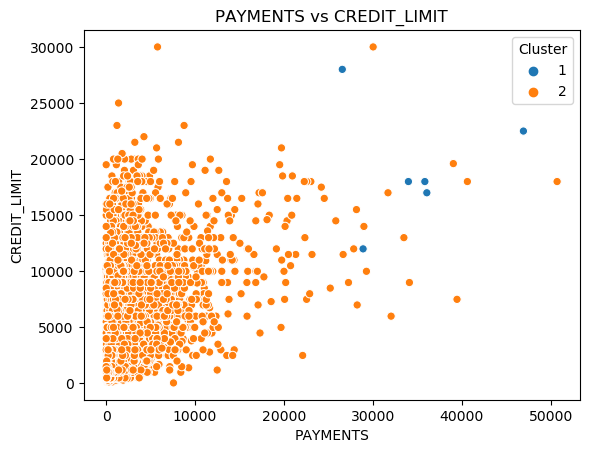

In [23]:
sns.scatterplot(data['PAYMENTS'], data['CREDIT_LIMIT'], hue = best_model, palette = 'tab10')
plt.title('PAYMENTS vs CREDIT_LIMIT')
plt.xlabel('PAYMENTS')
plt.ylabel('CREDIT_LIMIT')
plt.legend(title='Cluster', loc='upper right', frameon=True)
plt.show()

## Generating a histogram that shows the number of elements in each cluster

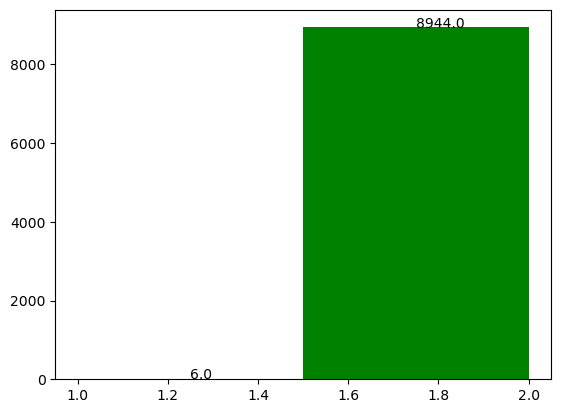

In [24]:
# Using hist() method to make a histogram. To show the count for each bar iterating the patches and calculating
# the mid-values of each patch and height of the patch to place a text.
_, _, patches = plt.hist(best_model, bins = 2, align="mid", color = 'green')

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.05
   plt.text(x, y, pp._y1)
plt.show() 

## Creating a separate dataframe for each cluster

In [25]:
# Converting best_model (numpy array) to pandas DataFrame and adding it to data
cluster = pd.DataFrame(best_model, columns = ['CLUSTER'])
data['CLUSTER'] = cluster
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,333.334108,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [26]:
cluster_a = data[data['CLUSTER'] == 2]
cluster_a = cluster_a.drop('CLUSTER', axis = 1)
cluster_a.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,333.334108,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
cluster_b = data[data['CLUSTER'] == 1]
cluster_b = cluster_b.drop('CLUSTER', axis = 1)
cluster_b.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
501,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
550,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
970,3108.393701,0.9,26582.34,15158.90,11423.44,0.000000,0.900000,0.800000,0.800000,0.000000,0,55,28000.0,26557.09724,586.029097,0.875000,10
1256,4010.621974,1.0,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12
1604,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12


## Describing each cluster using pandas.describe()

In [28]:
cluster_a.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000
mean,1561.215810,0.877200,978.078753,571.705632,406.673505,979.465372,0.490038,0.201982,0.364127,0.135226,3.250894,14.584414,4484.383736,1711.018337,836.083429,0.153375,11.517218
std,2075.358836,0.236966,1896.276670,1435.397691,877.453255,2097.734782,0.401321,0.297851,0.397366,0.200162,6.826462,24.209220,3617.446613,2761.954005,2330.387630,0.292153,1.338635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.129423,0.888889,39.405000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.211146,164.348651,0.000000,12.000000
50%,871.534477,1.000000,360.955000,37.575000,88.915000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.951036,294.299441,0.000000,12.000000
75%,2047.189110,1.000000,1108.787500,574.357500,467.340000,1114.022729,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,1898.467717,794.158412,0.142857,12.000000
max,19043.138560,1.000000,32539.780000,26547.430000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [29]:
cluster_b.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,6422.583983,0.983333,38457.815000,31496.550000,6961.265000,93.027814,0.955556,0.911111,0.827778,0.013889,0.166667,201.666667,19250.000000,34714.910860,3610.188038,0.659722,11.666667
std,4770.275330,0.040825,7395.837532,9964.410063,5927.937014,227.870677,0.072008,0.144016,0.217732,0.034021,0.408248,125.206496,5438.290172,7116.811867,6096.794517,0.396527,0.816497
min,2997.977825,0.900000,26582.340000,15158.900000,426.340000,0.000000,0.833333,0.666667,0.416667,0.000000,0.000000,55.000000,12000.000000,26557.097240,586.029097,0.083333,10.000000
25%,3179.220821,1.000000,36074.047500,26858.600000,2057.290000,0.000000,0.925000,0.850000,0.808333,0.000000,0.000000,115.000000,17250.000000,30171.180877,706.634356,0.375000,12.000000
50%,3701.162077,1.000000,39471.710000,33945.785000,6688.595000,0.000000,1.000000,1.000000,0.875000,0.000000,0.000000,176.000000,18000.000000,34919.176890,741.520918,0.812500,12.000000
75%,9663.295501,1.000000,40797.977500,38989.977500,10637.160000,0.000000,1.000000,1.000000,0.979167,0.000000,0.000000,306.750000,21375.000000,36010.969493,2422.305611,0.968750,12.000000
max,13479.288210,1.000000,49039.570000,40761.250000,15497.190000,558.166886,1.000000,1.000000,1.000000,0.083333,1.000000,358.000000,28000.000000,46930.598240,15914.484620,1.000000,12.000000


### <span style='color:blue'>Based on the results, we have identified a majority group and a niche group. For the majority group, the strategy should focus on identifying common spending patterns and product preferences. This will allow us to offer them products that interest them the most. For the niche group, there may be unique needs that require further insights to determine whether the customers within this cluster could be high-value customers or early adopters. Exclusive offers could be the best approach for engaging them.</span>